# Tutorial 03: Viewing predictions

The process of viewing predictions consists basically on juxtaposing the predictions we created and the raster images. Therefore, we will need to load the rasters we used on the previous tutorials to compute the features and the predictions that we stored. Let's get started.

In [11]:
import pandas as pd
import rasterio
from matplotlib import pyplot as plt

from damage.features import RasterSplitter

def plot_image(image):
    fix, ax = plt.subplots(figsize=(25, 25))
    ax.imshow(image)
    return ax

In [12]:
raster_path = '../data/city_rasters'
raster_file_name = 'daraa_2017_02_07_zoom_19.tif'
raster = rasterio.open('{}/{}'.format(raster_path, raster_file_name))
raster_array = RasterSplitter._raster_to_array(raster)

In [13]:
path = '../logs/predictions'
file_name = 'prediction_test.p'
results = pd.read_pickle('{}/{}'.format(path, file_name))
print(results.shape)
results.head()

(62, 1)


prediction
city  patch_id   date                  
daraa 10560-6720 2013-09-07         1.0
      12480-6080 2013-09-07         1.0
      1600-4160  2013-09-07         1.0
      2240-4160  2013-09-07         1.0
      2880-4160  2013-09-07         1.0

In [14]:
prediction_destroyed = results.loc[results['prediction'] == 1]
prediction_non_destroyed = results.loc[results['prediction'] == 0]
patches_destroyed = pd.DataFrame([elem[1].split('-') for elem in prediction_destroyed.index.tolist()], columns=['row', 'column']).astype(int)
patches_non_destroyed = pd.DataFrame([elem[1].split('-') for elem in prediction_non_destroyed.index.tolist()], columns=['row', 'column']).astype(int)

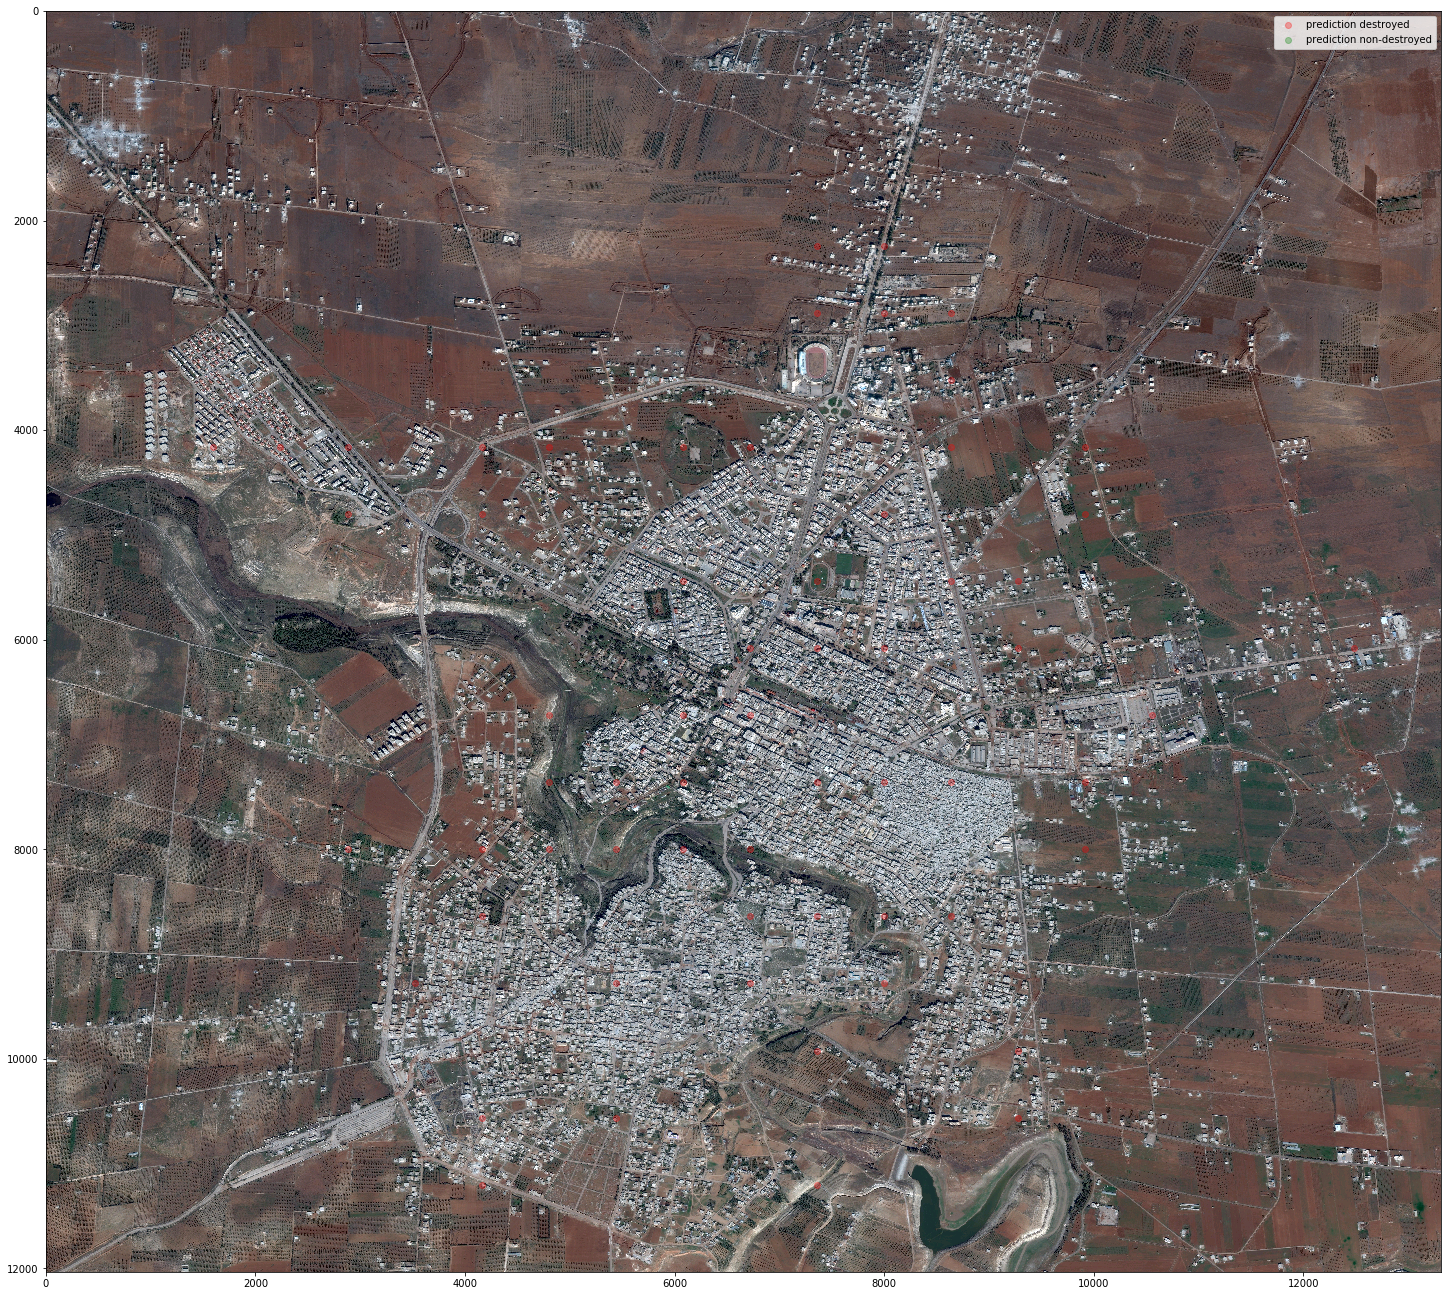

In [15]:
ax = plot_image(raster_array)
ax.scatter(patches_destroyed['row'], patches_destroyed['column'], color='r', label='prediction destroyed', alpha=0.3)
ax.scatter(patches_non_destroyed['row'], patches_non_destroyed['column'], color='g', label='prediction non-destroyed', alpha=0.3)
plt.legend()